# 90 sets models
In this notebook we are creating models for using on the data that are a concatenation of 90 sets in total and the individuals parameters

In [0]:
from helpers import print_mean_squared_error, print_coefficient_of_determination

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

L = []

for i in range(90):
    L.append(f"rep{i}")
    L.append(f"weight{i}")

L2 = ["load_week1", "max_week1", "load_week2", "max_week2", "load_week3", "max_week3", "load_week4", "max_week4", "performance"]
L += L2

# Read the CSV file.
data = pd.read_csv("./data/regression_dataframes2.csv", names=L)

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

Y = data_shuffled['performance']
Y.head()

# Split into input part X and output part Y.
X = data_shuffled.drop('performance', axis=1)

# # Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


FileNotFoundError: ignored

In [0]:
X.head()

rep0  weight0  rep1  weight1  rep2  weight2  rep3  weight3  rep4  weight4  \
26   8.0     36.0   8.0     36.0   8.0     36.0   8.0     36.0  12.0     34.0   
86   8.0     41.0   8.0     41.0   8.0     41.0   8.0     41.0   8.0     42.0   
2    8.0     27.0   8.0     27.0   8.0     27.0   8.0     27.0  12.0     26.0   
55   5.0     30.0   5.0     30.0   5.0     30.0   5.0     30.0   5.0     30.0   
75  12.0     24.0  12.0     24.0  12.0     24.0  12.0     24.0   8.0     26.0   

    ...  rep87  weight87  rep88  weight88  rep89  weight89   age  \
26  ...    8.0      46.0    8.0      46.0    8.0      46.0  21.0   
86  ...    8.0      53.0    8.0      53.0   12.0      50.0  18.0   
2   ...   12.0      32.0   12.0      32.0   12.0      32.0  46.0   
55  ...   12.0      35.0   12.0      35.0   12.0      35.0  22.0   
75  ...   12.0      31.0   12.0      31.0   12.0      31.0  50.0   

    person_weight  gender  pre-performance  
26           89.0     2.0             48.0  
86           66.0     2.0             55.0  
2           107.0     0.0             36.0  
55          104.0     0.0             38.0  
75           61.0     1.0             35.0  

[5 rows x 184 columns]

Explained variation per principal component: [0.62424181 0.0619431  0.03172018]


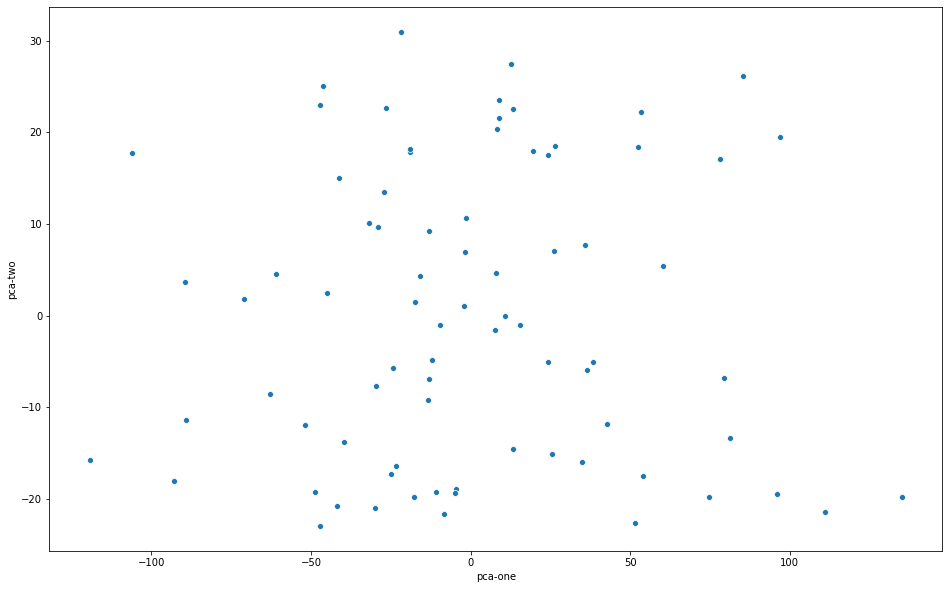

In [0]:
# plotting the data using PCA
from visualizers import model_plotter
model_plotter.Reducer_plotter.pca_plot(Xtrain)


# Basic linear regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Träna modellen
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)

#Använd på testsettet
Ypred = lr.predict(Xtest)

lr_mean_squared_error = mean_squared_error(Ytest, Ypred)
lr_r2_score = r2_score(Ytest, Ypred)

print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)



Mean squared error: 0.40
Coefficient of determination: 0.99


## Ridge regression

In [0]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)
# Ridge()
ridge_Ypred = ridge.predict(Xtest)

ridge_mean_squared_error = mean_squared_error(Ytest, ridge_Ypred)
ridge_r2_score = r2_score(Ytest, ridge_Ypred)

print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)


Mean squared error: 0.38
Coefficient of determination: 0.99


## Lasso regression

In [0]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
lasso_Ypred = lasso.predict(Xtest)

lasso_mean_squared_error = mean_squared_error(Ytest, lasso_Ypred)
lasso_r2_score = r2_score(Ytest, lasso_Ypred)

print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)


Mean squared error: 0.63
Coefficient of determination: 0.99





## Summaries of the result & Plotting Learning Curves

Normal linear regression:
Mean squared error: 0.40
Coefficient of determination: 0.99


Lasso regression:
Mean squared error: 0.63
Coefficient of determination: 0.99


Ridge regression:
Mean squared error: 0.38
Coefficient of determination: 0.99




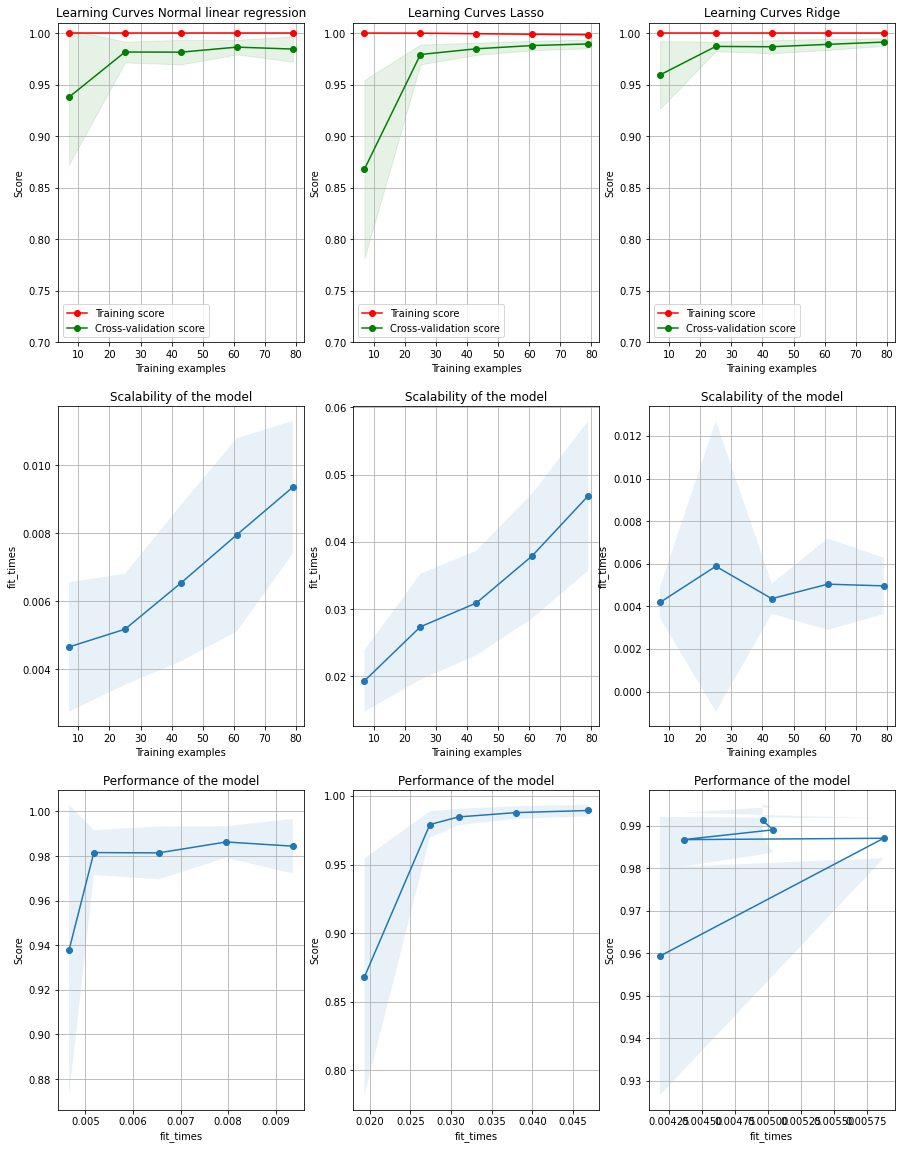

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from visualizers.model_learning_curve_plotter import Learning_curve_plotter

fig, axes = plt.subplots(3, 3, figsize=(15, 20))


title = "Learning Curves Normal linear regression"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = LinearRegression()
Learning_curve_plotter(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print("Normal linear regression:")
print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)
print("\n")


title = "Learning Curves Lasso"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = linear_model.Lasso(alpha=0.1)
Learning_curve_plotter(estimator, title, X, Y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print("Lasso regression:")
print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)
print("\n")



title = "Learning Curves Ridge"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = Ridge(alpha=1.0)
Learning_curve_plotter(estimator, title, X, Y, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print("Ridge regression:")
print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)
print("\n")


